# Redes neuronales

Una red neuronal es un modelo computacional inspirado en la estructura del cerebro humano. Se compone de una estructura diseñada para la representación de datos y un conjunto de algoritmos que permiten procesar y analizar dicha información. Una característica clave de las redes neuronales es que se basan en algoritmos de aprendizaje. Estos modelos se caracterizan por un conjunto de parámetros ajustables que se optimizan con el fin de minimizar una función de costo, la cual mide la discrepancia entre la salida esperada y la obtenida para un conjunto de datos de entrenamiento. El objetivo final es que la red sea capaz de generalizar, es decir, que para entradas que no forman parte del conjunto de entrenamiento, las salidas generadas se aproximen a los valores esperados.


La estructura de una red neuronal consiste en un conjunto de neuronas interconectadas, también conocidas como nodos.
Una estructura de red neuronal muy utilizada es la de capas (layers) que se muestra en la siguiente figura.

![https://www.geeksforgeeks.org/artificial-neural-networks-and-its-applications/](https://drive.google.com/uc?export=view&id=1y1OvrNUamwmz8r-jJJt30SiKjRKhohHo)


En esta configuración, se distinguen las siguientes capas:
- Capa de Entrada (Input Layer): donde se introducen los datos de entrada al sistema.
- Capas Ocultas (Hidden Layers): responsables de procesar la información intermedia.
- Capa de Salida (Output Layer): de donde se obtiene el resultado final.

La neurona $i$-ésima de la capa $L$-ésima en la red se representa mediante una variable $a^{(L)}_i$ que generalmente puede tomar valores en el intervalo $[0, 1]$. Las conexiones entre las neuronas $i$ y $j$ de las capas $L-1$ y $L$, respectivamente, se representan por pesos $\omega^{(L)}_{i,j}$, que son números reales.

Una vez determinados los pesos de las conexiones neuronales, el resultado de salida es una función de los datos de entrada.





Combinación lineal (pre-activación) en la capa $L$:
$$ z^{(L)}_i = \sum_{j} \omega^{(L)}_{i,j} a^{(L-1)}_j + b^{(L)}_i $$

2. Activación de las neuronas en la capa $L$:
   $$ a^{(L)}_i = \sigma(z^{(L)}_i) $$


- $z^{(L)}_i$ es el valor de pre-activación de la neurona $i$ en la capa $l$.
- $a^{(L)}_i$ es la activación de la neurona $i$ en la capa $l$.
- $\omega^{(L)}_{i,j}$ es el peso que conecta la neurona $j$ en la capa $L-1$ con la neurona $i$ en la capa $l$.
- $b^{(L)}_i$ es el sesgo de la neurona $i$ en la capa $L$.
- $\sigma(\cdot)$ es la función de activación. Por ejemplo

    - Sigmoide: $$\sigma(z)=\frac{1}{1+e^{-z}}$$
    - ReLU: $$\sigma(z)=\max(0,z)$$


## Red de tres nodos y compuerta NAND
![nn1](https://drive.google.com/uc?export=view&id=1LqpFF13pzomapXh2iHeXiA9cHXcIxZnq)

En esta red se tienen dos neuronas de entrada y una de salida.
La salida se calcula como
$$
a_0^{(1)}=\sigma\left(\omega_{0,0}\,a_0^{(0)} +\omega_{0,1}\,a_1^{(0)}-b_0^{(1)}\right),
$$



In [ ]:
# @title
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import FancyArrow
from ipywidgets import interactive, widgets
import matplotlib

# Ensure the use of an interactive backend
matplotlib.use('module://ipykernel.pylab.backend_inline')

# Función sigmoide
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Grafica la red neuronal y calcula la salida
def graficar_red_neuronal(peso1, peso2, entrada1, entrada2, umbral):
    # Limpiar la figura actual
    plt.clf()

    # Crear figura y ejes
    figura, ejes = plt.subplots()
    ejes.set_aspect('equal', 'box')

    # Coordenadas de los nodos
    nodos_entrada = [(0, 2), (0, 0)]
    nodo_salida = (2, 1)

    # Graficar nodos de entrada
    for nodo in nodos_entrada:
        ejes.add_patch(plt.Circle(nodo, 0.3, color='blue', zorder=2))

    # Graficar nodo de salida
    ejes.add_patch(plt.Circle(nodo_salida, 0.3, color='red', zorder=2))

    # Graficar conexiones y pesos
    pesos = [peso1, peso2]
    entradas = [entrada1, entrada2]
    for i, nodo in enumerate(nodos_entrada):
        ejes.add_patch(FancyArrow(nodo[0] + 0.1, nodo[1], 1.7, (nodo_salida[1] - nodo[1]),
                                  width=0.02, color='gray'))
        ejes.text(nodo[0]-0.2, nodo[1]+0.4, f'$a_{i}'+'^{(0)}'+f'=${entradas[i]:.2f}', fontsize=12, color='blue')

        ejes.text((nodo[0] + nodo_salida[0]) / 2, (nodo[1] + nodo_salida[1]) / 2 + 0.2 * (-1)**i ,
                  f'$w_{{0,{i}}}$={pesos[i]:.2f}', fontsize=12, color='black')


    # Calcular la salida de la neurona
    entrada_neta = peso1 * entrada1 + peso2 * entrada2 - umbral
    salida = sigmoid(entrada_neta)

    # Graficar el valor del nodo de salida
    ejes.text(nodo_salida[0] - 0.2, nodo_salida[1]+0.4, '$a_0^{(1)}$'+f'={salida:.2f}', fontsize=12, color='red')

    # Ajustar la gráfica
    ejes.set_xlim(-0.5, 3)
    ejes.set_ylim(-1, 3)
    ejes.set_xticks([])
    ejes.set_yticks([])

    plt.show()

# Usar la función interactiva
grafica_interactiva = interactive(
    graficar_red_neuronal,
    peso1=widgets.FloatSlider(min=-10.0, max=10.0, step=1.0, value=-6.0, description=r'w00'),
    peso2=widgets.FloatSlider(min=-10.0, max=10.0, step=1.0, value=-6.0, description=r'w01'),
    entrada1=widgets.FloatSlider(min=0.0, max=1.0, step=0.1, value=1.0, description=r'a0(0)'),
    entrada2=widgets.FloatSlider(min=0.0, max=1.0, step=0.1, value=1.0, description=r'a1(0)'),
    umbral=widgets.FloatSlider(min=-20.0, max=20.0, step=1.0, value=-8.0, description=r'b')
)


grafica_interactiva


interactive(children=(FloatSlider(value=-6.0, description='w00', max=10.0, min=-10.0, step=1.0), FloatSlider(v…

Como la compuerta `NAND` es universal para computación clásica, esto muestra que podemos construir cualquier algoritmo introduciendo un número adecuado de neuronas y capas ocultas.


Lo que hace a las redes neuronales particularmente útiles es el método mediante el cual se determinan los pesos de las conexiones. En el contexto del *aprendizaje supervisado*, se dispone de un conjunto de datos de entrada para los cuales se conocen los valores de salida esperados. El objetivo es que la red aprenda a generar la respuesta correcta para los datos de entrenamiento y, además, logre generalizar, es decir, producir la salida adecuada para entradas que no formaban parte del conjunto de entrenamiento. Por ejemplo, en la tarea de clasificación de imágenes de perros y gatos, se espera que la red clasifique correctamente una nueva imagen que no haya sido parte del entrenamiento.


El algoritmo de **retropropagación** (backpropagation) es un método utilizado para ajustar los pesos y sesgos a partir del cálculo del gradiente del error con respecto a esos parámetros. El objetivo es minimizar una función de pérdida utilizando un optimizador, como el descenso por gradiente.

### 1. **Propagación hacia adelante**
Consideramos un dato de entrenamiento. Se realiza una pasada hacia adelante con esa entrada a través de la red para calcular las activaciones en cada capa, hasta obtener la salida de la red:

- Para cada capa $L$, se calculan las pre-activaciones y activaciones utilizando las fórmulas:

$$ z^{(L)}_i = \sum_j \omega^{(L)}_{i,j} a^{(L-1)}_j + b^{(L)}_i $$
$$ a^{(L)}_i = \sigma(z^{(L)}_i) $$

- La salida final de la red $ a^{(L)} $ se compara con la verdadera salida $ y $ utilizando una función de costo $ \mathcal{C}(a^{(L)}, y)$, por ejemplo, el error cuadrático medio:
$$
\mathcal{C}(a^{(L)}, y)=\sum_i\left(a^{(L)}_i- y_i \right)^2
$$

### 2. **Retropropagación del error**
Nos interesa conocer cómo se modifica la función de costo ante pequeñas variaciones de los parámetros, de manera de desplazarnos en el espacio de parámetros buscando minimizar la función de costo para el conjunto de datos de entrenamiento. Un método comunmente utilizado es el del descenso por el gradiente y su variantes
$$
\frac{\partial \mathcal{C}}{\partial\omega^{(L)}}
$$



En este paso, se calcula cómo varía el error con respecto a los pesos y sesgos de cada capa. Se utiliza la regla de la cadena para encontrar los gradientes de los pesos y sesgos. El proceso se inicia en la capa de salida y se va propagando hacia las capas anteriores.

- **Cálculo del error en la capa de salida**:
  
  El error de la capa de salida se calcula en función de la derivada de la función de costo respecto a la activación de la capa $L$:

$$ \delta^{(L)}_i = \frac{\partial \mathcal{C}}{\partial a^{(L)}_i} \cdot \sigma'(z^{(L)}_i) $$

donde $\sigma'(z^{(L)}_i)$ es la derivada de la función de activación.

- **Cálculo del error en capas ocultas**:
  
  El error se propaga hacia atrás utilizando la derivada de los errores de la capa siguiente $L+1$:

$$ \delta^{(L-1)}_i = \left( \sum_k \delta^{(L)}_k \omega^{(L)}_{k,i} \right) \cdot \sigma'(z^{(L-1)}_i) $$

### 3. **Actualización de los pesos y sesgos**
Una vez calculados los gradientes, se actualizan los pesos $ \omega^{(L)}_{i,j} $ y los sesgos $ b^{(L)}_i $ utilizando una regla de actualización, por ejemplo, el descenso por gradiente con una tasa de aprendizaje $ \eta $:

- Actualización de los pesos:

$$ \omega^{(L)}_{i,j} = \omega^{(L)}_{i,j} - \eta \frac{\partial E}{\partial \omega^{(L)}_{i,j}} $$

- Actualización de los sesgos:

$$ b^{(L)}_i = b^{(L)}_i - \eta \frac{\partial E}{\partial b^{(L)}_i} $$

Aquí, $ \frac{\partial E}{\partial \omega^{(L)}_{i,j}} $ y $ \frac{\partial E}{\partial b^{(L)}_i} $ se calculan a partir de los errores propagados en cada capa.



El error que se quiere minimizar es con respecto al conjunto de los datos de entrenamiento, por lo que tendríamos que sumar sobre todos los datos.

Este proceso se repite para cada ejemplo de entrenamiento hasta que el error se minimice adecuadamente o se alcance un criterio de convergencia.

# Identificación de cifras de la base de datos MNIST

La base de datos MNIST es un conjunto de imágenes de dígitos del 0 al 9, que han sido previamente clasificadas con su correspondiente etiqueta numérica. Cada imagen tiene una resolución de $28 \times 28$ píxeles, y cada píxel en la imagen puede tomar un valor de intensidad que varía en 256 niveles de gris, es decir, un número entero en el intervalo $[0, 255]$.

En la imagen más abajo se muestran diferentes ejemplos.

![MNIST](https://upload.wikimedia.org/wikipedia/commons/f/f7/MnistExamplesModified.png)

En la mayoría de los casos, a los humanos nos resulta fácil determinar de qué número se trata. Sin embargo, no resulta evidente cómo construir un algoritmo que haga ese trabajo con un nivel de error similar. Esto se debe a que los píxeles que se activan (están más oscuros) no son los mismos aunque el dígito se repita. Puede cambiar el grosor del trazo, la inclinación, la forma y el tamaño, lo que complica la creación de un algoritmo con reglas explícitas.


Queremos entrenar a una red neuronal utilizando estas imágenes. Vamos a incluir una neurona de ntrada por cada píxel de la imagen. El valor de la neurona va a estar dada pos la escala de grises normalizada a $1$ (de manera que sea un número entre $0$ y $1$).

Para la salida vamos a necesitar 10 neuronas y vamos a buscar que se active la neurona $i$-ésima de la salida cuando ponemos la imagen del número $i=\{0,1,\ldots,9\}$.



###Implementación usando la librería de python [TensorFlow](https://www.tensorflow.org/)

"*An entire ecosystem to help you solve challenging, real-world problems with machine learning*"

Vamos a cargar la base de datos MNIST que ya está separada en $60.000$ imágenes de entrenamiento y $10.000$ de testeo.

La base de datos tiene pares de (imagen, clasificación).

In [16]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical


# Cargamos los datos MNIST separados en datos de entrenamiento y de testeo
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalizamos la escala de gris al rango [0,1] y cambiamos la forma de las
# imágenes para ponerlas en un vector de 28x28 = 784 componentes
x_train = x_train.reshape((x_train.shape[0], 28 * 28)).astype('float32') / 255
x_test = x_test.reshape((x_test.shape[0], 28 * 28)).astype('float32') / 255

# Representa las etiquetas que val del 0 al 9 para representarlas
# con vectores de salida
y_train = to_categorical(y_train)
y_test_cat = to_categorical(y_test)  # Save the categorical format for evaluation

# Denfinimos un modelo de red neuronal por capas
model = models.Sequential()

# Primera capa, de 784 nodos a 128 nodos con conexiones todas con todas
model.add(layers.Dense(128, activation='relu', input_shape=(28 * 28,)))

# Segunda capa, de 128 nodos a 64 nodos con conexiones todas con todas
model.add(layers.Dense(64, activation='relu'))

# Capa de salida
model.add(layers.Dense(10, activation='softmax'))

# Definimos el método de optimización "adam" que funciona mejor que
# descenso por el gradiente
# y como función de pérdida el error cuadrático medio
model.compile(optimizer='adam',
              loss='mean_squared_error',
              metrics=['accuracy'])

# Entrenamos el modelo
model.fit(x_train, y_train, epochs=5, batch_size=64, validation_split=0.1)

# Evaluamos en los datos de prueba para ver la precisión de la red con datos no usados en el entrenamiento
test_loss, test_acc = model.evaluate(x_test, y_test_cat)
print(f"Precisión: {test_acc}")

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.8463 - loss: 0.0229 - val_accuracy: 0.9622 - val_loss: 0.0061
Epoch 2/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.9579 - loss: 0.0066 - val_accuracy: 0.9705 - val_loss: 0.0046
Epoch 3/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9731 - loss: 0.0043 - val_accuracy: 0.9742 - val_loss: 0.0039
Epoch 4/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.9793 - loss: 0.0034 - val_accuracy: 0.9762 - val_loss: 0.0037
Epoch 5/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.9829 - loss: 0.0027 - val_accuracy: 0.9752 - val_loss: 0.0036
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9730 - loss: 0.0044
Test accuracy: 0.9751999974250793


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
Valores en las neuronas de salida
0: 2.2364783944794908e-05
1: 0.0002641623141244054
2: 0.9959190487861633
3: 0.00011552950309123844
4: 0.0013809906085953116
5: 6.480049341917038e-05
6: 0.001901591313071549
7: 0.00028640165692195296
8: 4.517538764048368e-05
9: 4.2161976132604195e-09


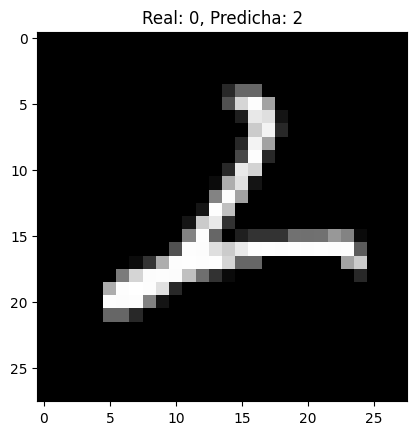

In [18]:

import numpy as np
import matplotlib.pyplot as plt

# Ejemplo
test_index = 43
test_image = x_test[test_index].reshape(1, 28 * 28)  # Seleccionamos una de las imágenes
etiqueta_real = np.argmax(y_test[test_index])  # Leemos la etiqueta

output = model.predict(test_image)
print("Valores en las neuronas de salida")
for i in range(10):
    print(f'{i}: {output[0][i]}')
etiqueta_predicha = np.argmax(output, axis=-1)[0]


# Imagen en escala de grises
plt.imshow(x_test[test_index].reshape(28, 28), cmap='gray')
plt.title(f"Real: {etiqueta_real}, Predicha: {etiqueta_predicha}")
plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


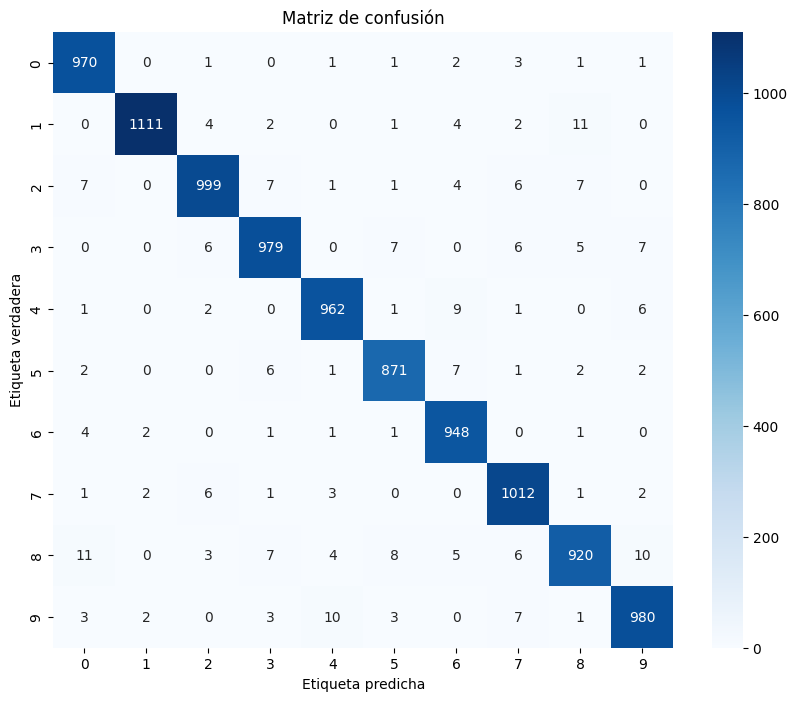

In [20]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Predict the labels for the test set
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)  # Predicted class indices

# Convert y_test from one-hot encoded format to class labels
y_test_classes = np.argmax(y_test_cat, axis=1)

# Compute the confusion matrix
conf_matrix = confusion_matrix(y_test_classes, y_pred_classes)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.xlabel('Etiqueta predicha')
plt.ylabel('Etiqueta verdadera')
plt.title('Matriz de confusión')
plt.show()